<a href="https://colab.research.google.com/github/Daivar/PP-_electric_cars_price_prediction/blob/main/ElectricCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/09/data-analysis-and-price-prediction-of-electric-vehicles/#h2_3
https://www.kaggle.com/prateekmaj21/electric-cars-data-analysis/notebook

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv("Cheapestelectriccars-EVDatabase.csv")
# df1= pd.read_csv("Cheapestelectriccars-EVDatabase 2023.csv")

In [3]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [4]:
print(df1.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [5]:
#filling empty data with 0

df1=df1.fillna('0')

In [6]:
df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]

In [7]:
#cleaning the data

#removing currency sign

PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

In [8]:
PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

In [9]:
FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed

In [10]:
Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency

In [11]:
Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range

In [12]:
TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed

In [13]:
Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration

In [14]:
Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

In [15]:
df1= df1.rename(columns = {'Subtitle':'KWH'})


In [16]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


In [18]:
df1.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<AxesSubplot:>

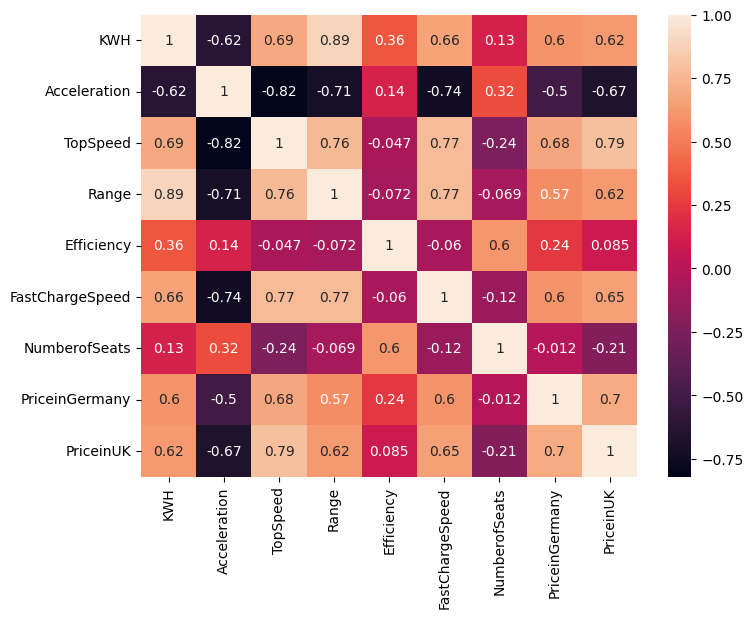

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

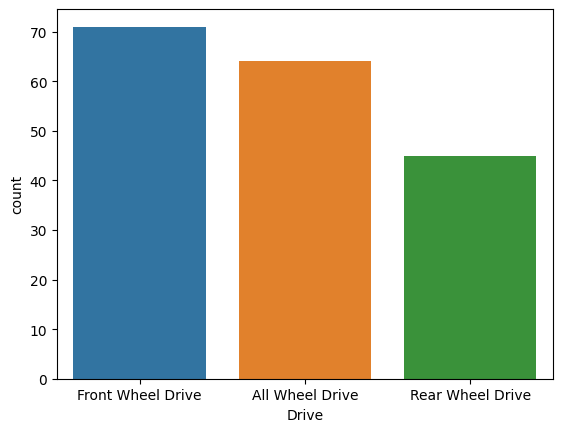

In [20]:
sns.countplot(x = 'Drive', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

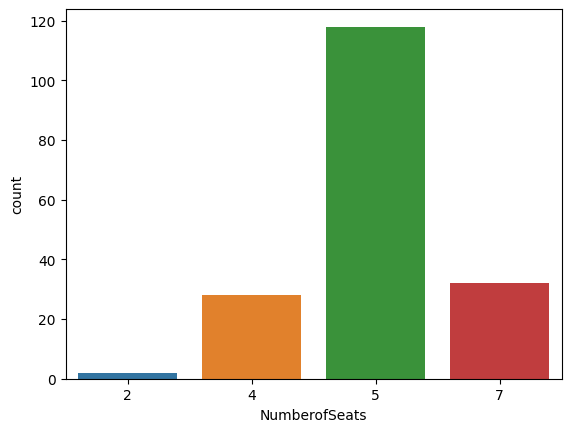

In [21]:
sns.countplot(x = 'NumberofSeats', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

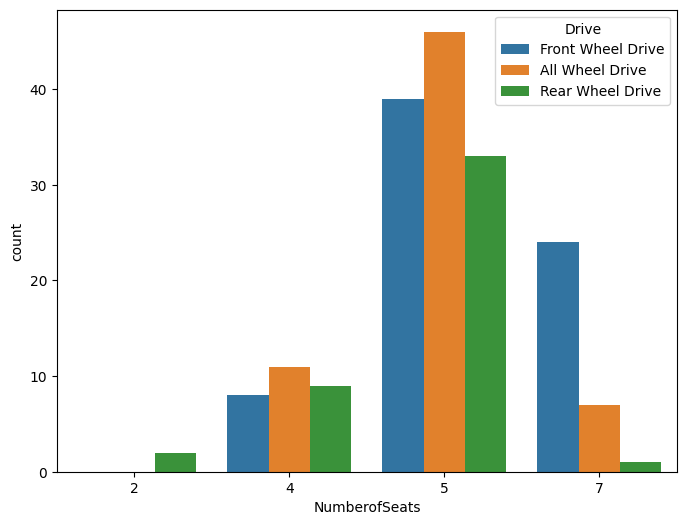

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

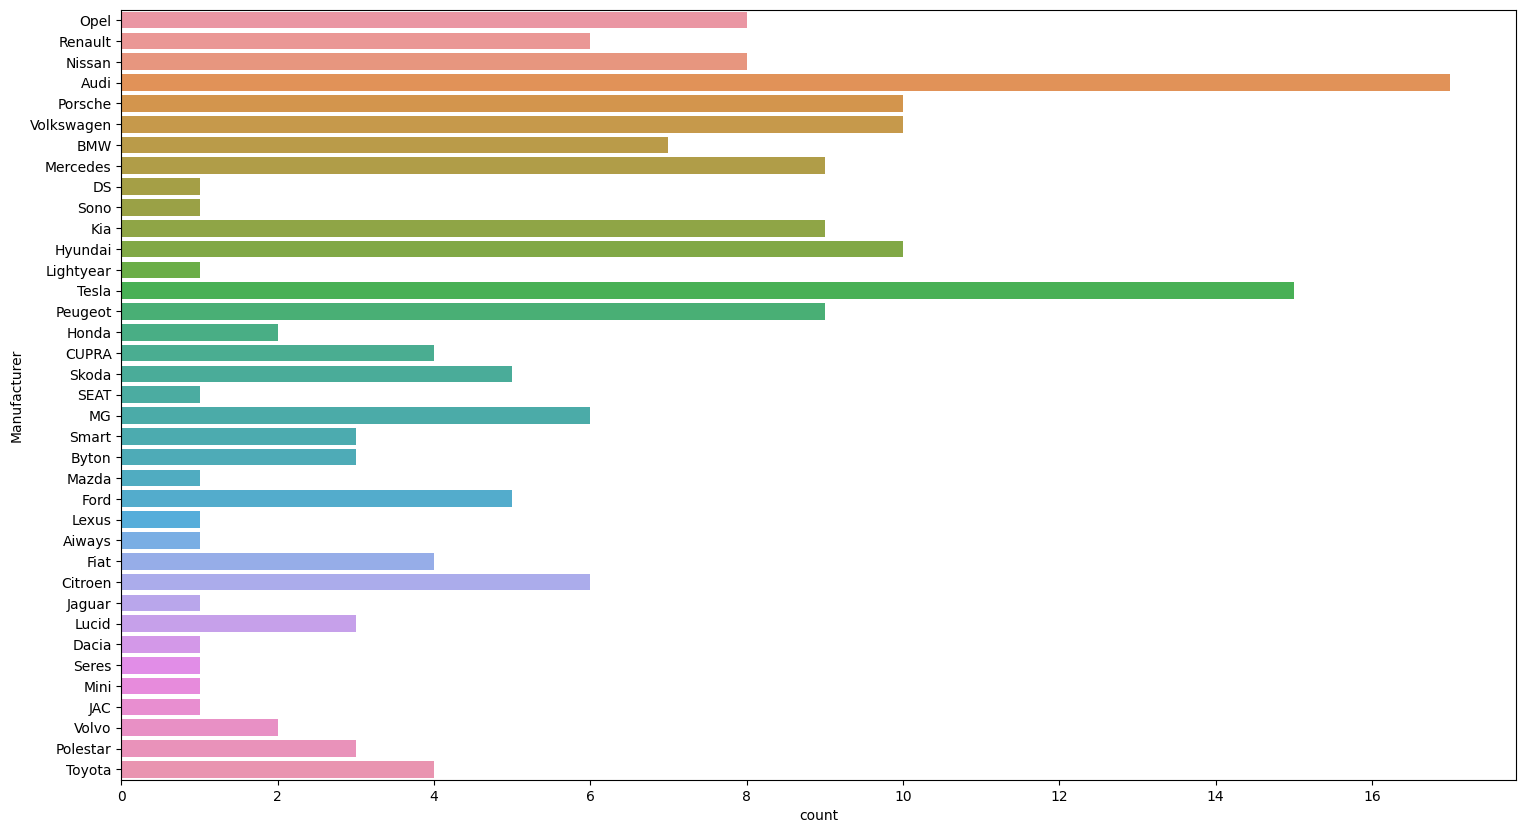

In [23]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)

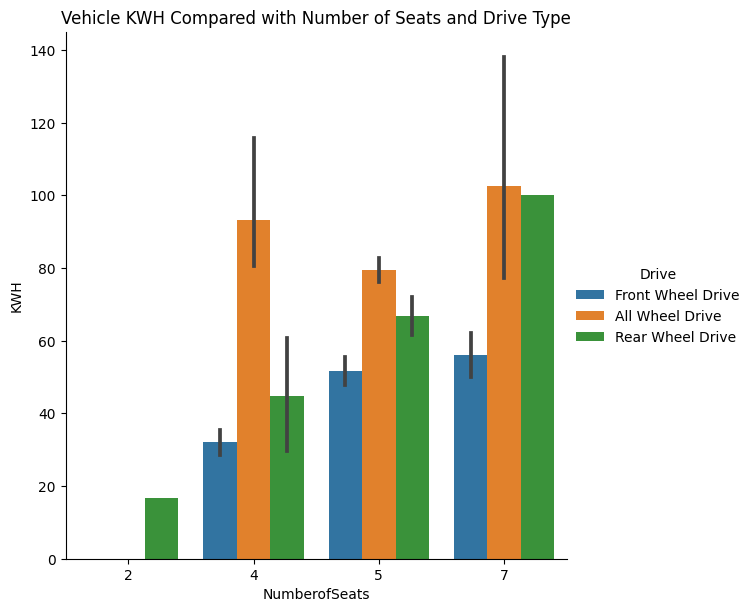

In [25]:
sns.catplot(data=df1, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

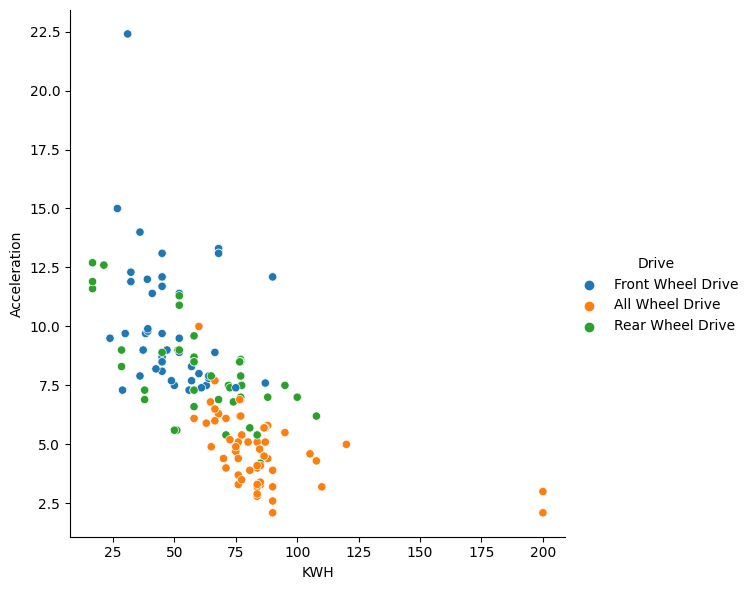

In [26]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)

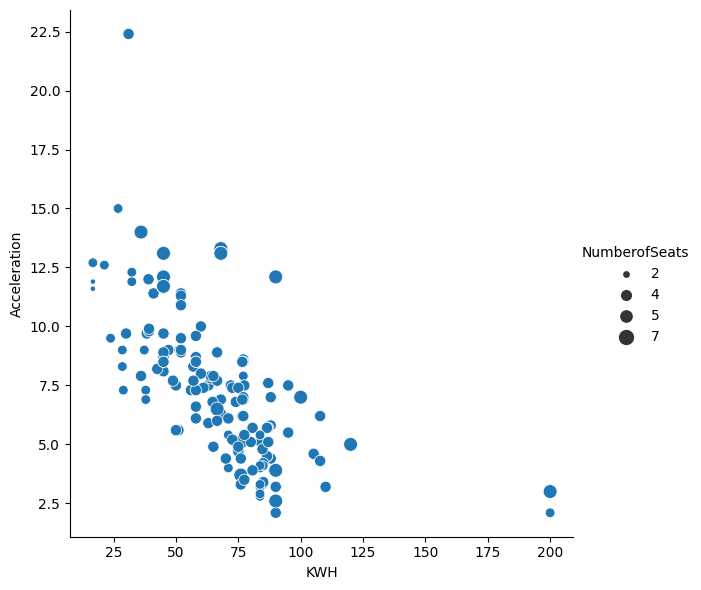

In [27]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)

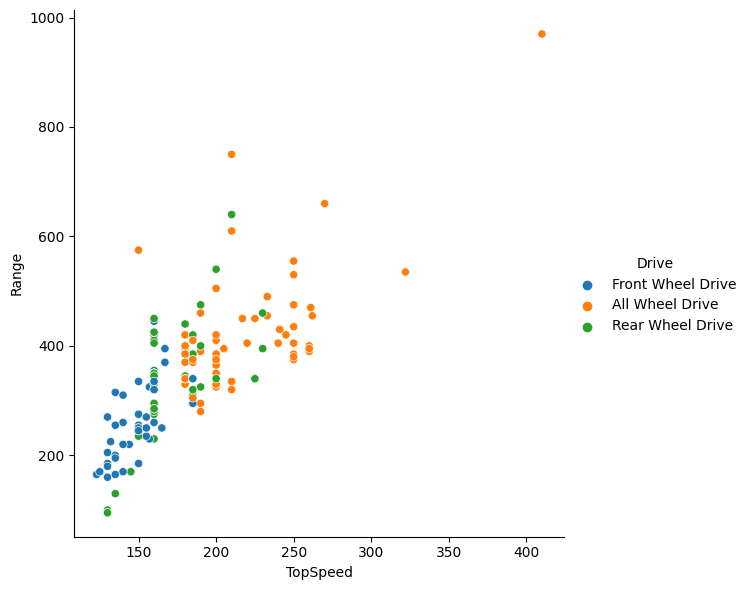

In [28]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)

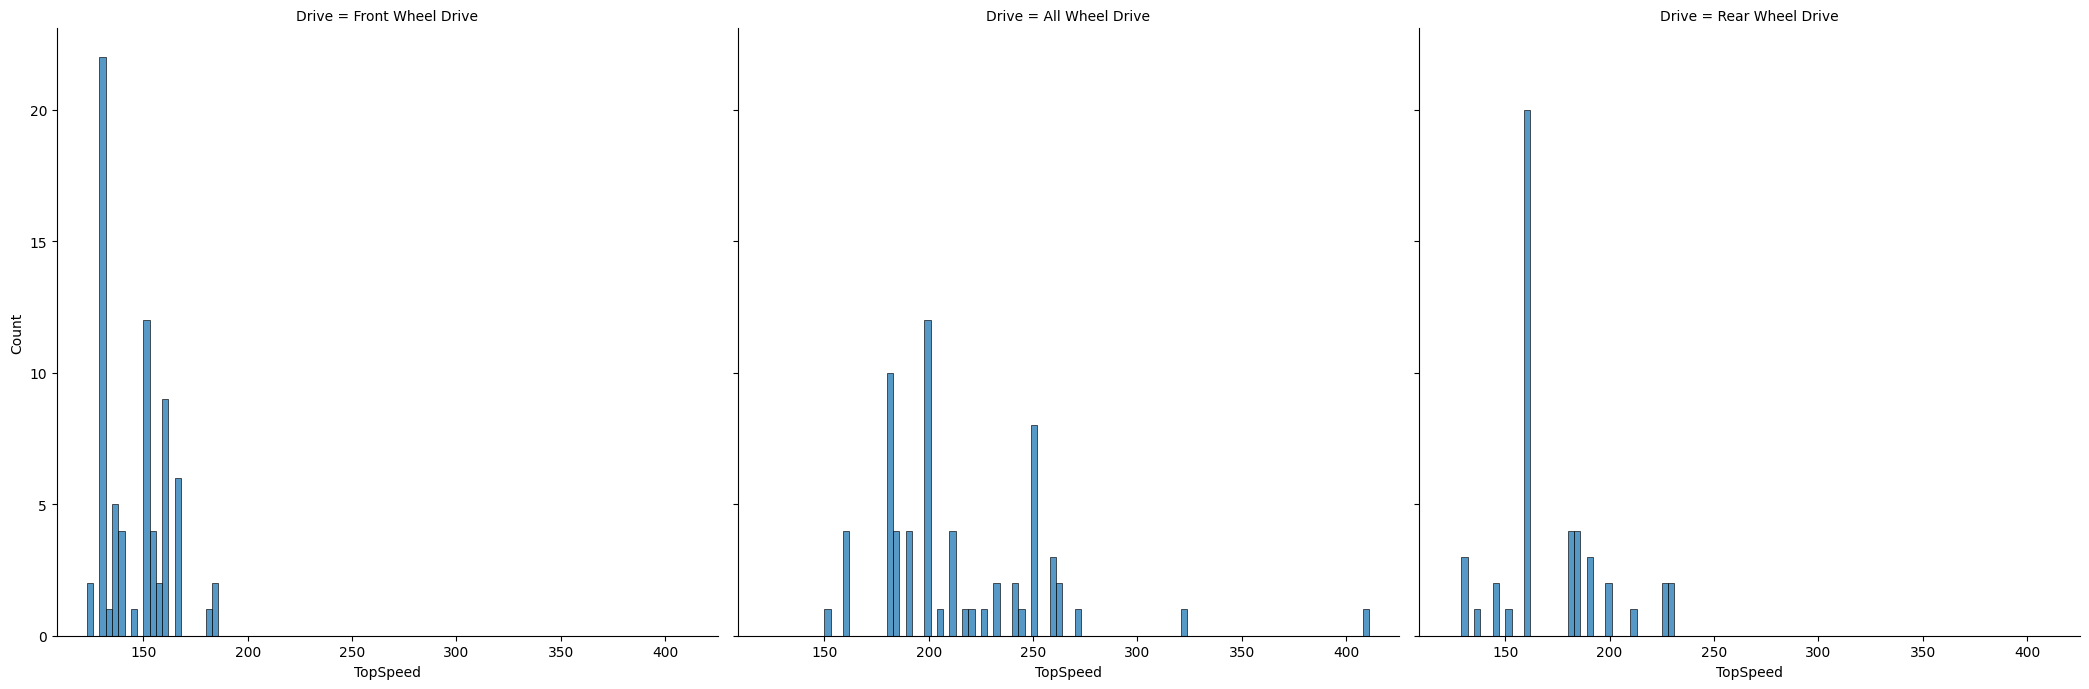

In [31]:
sns.displot(
    df1, x="TopSpeed", col="Drive", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

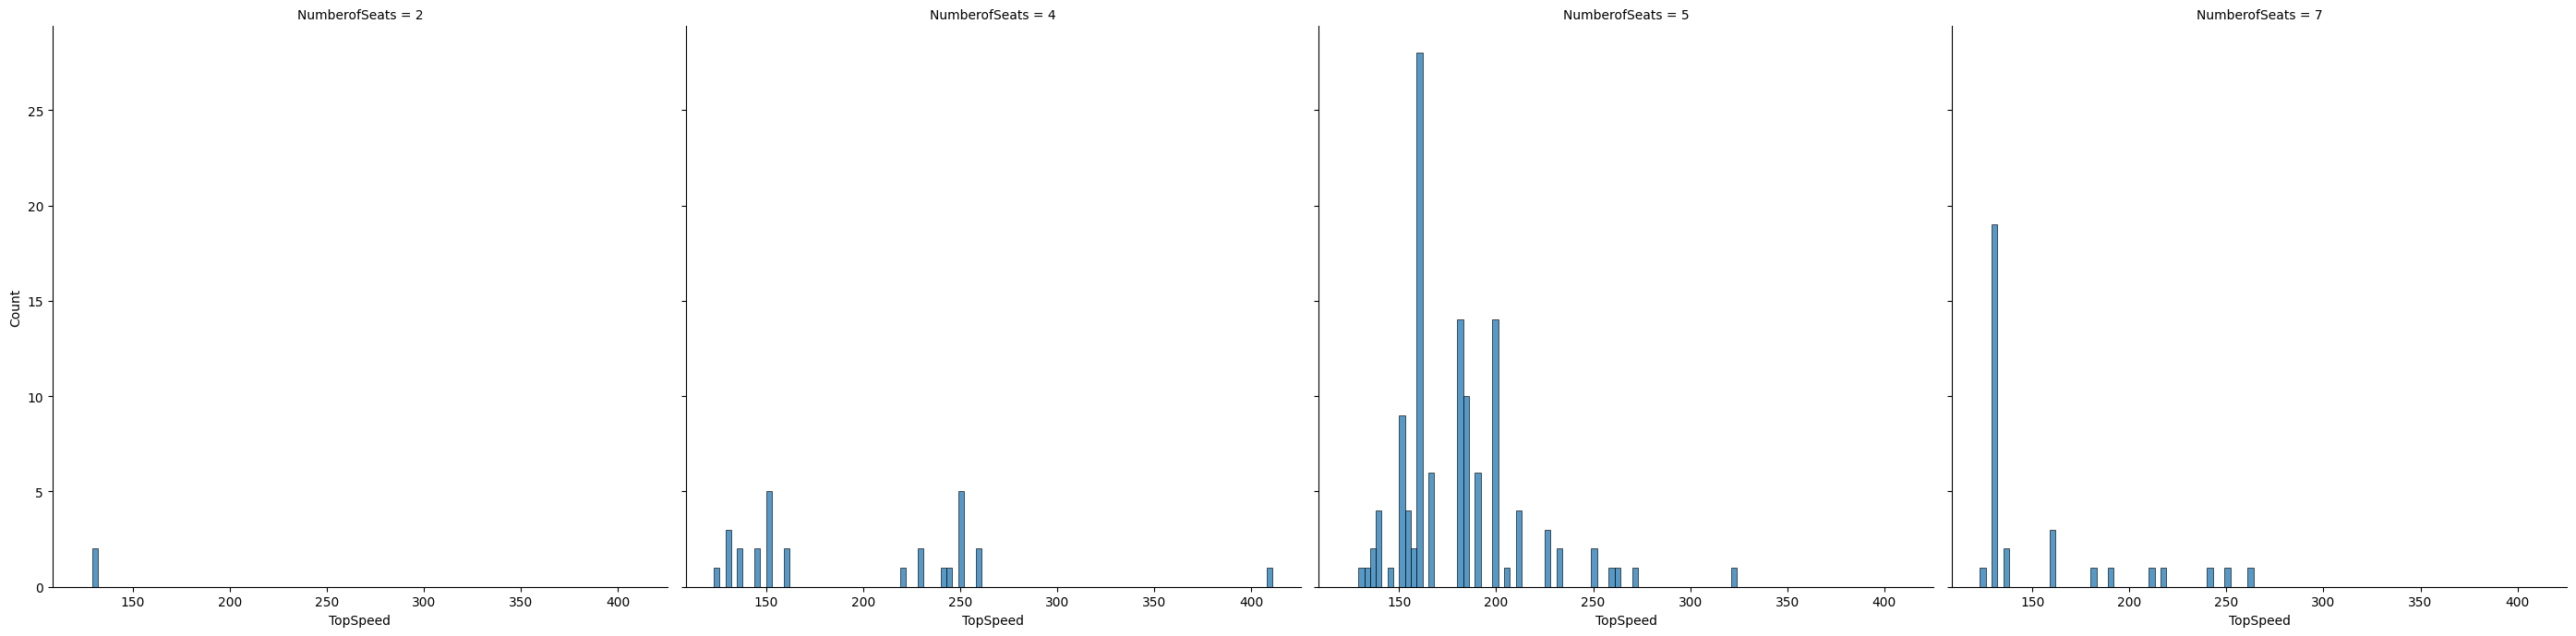

In [32]:
sns.displot(
    df1, x="TopSpeed", col="NumberofSeats", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

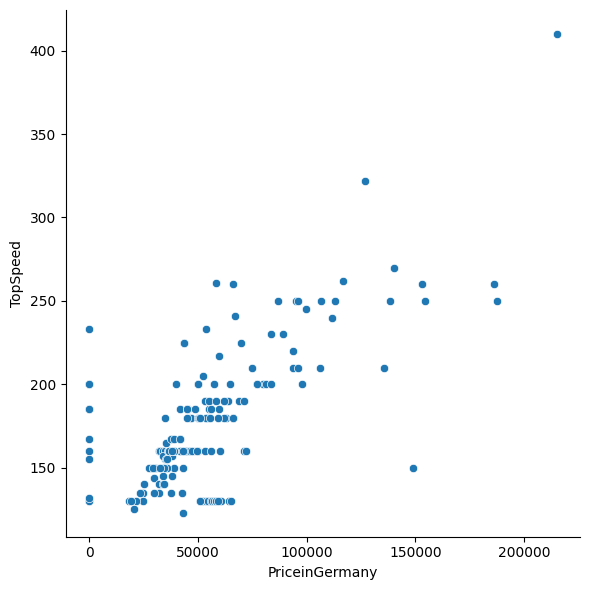

In [33]:
#relation between price and features

sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df1)

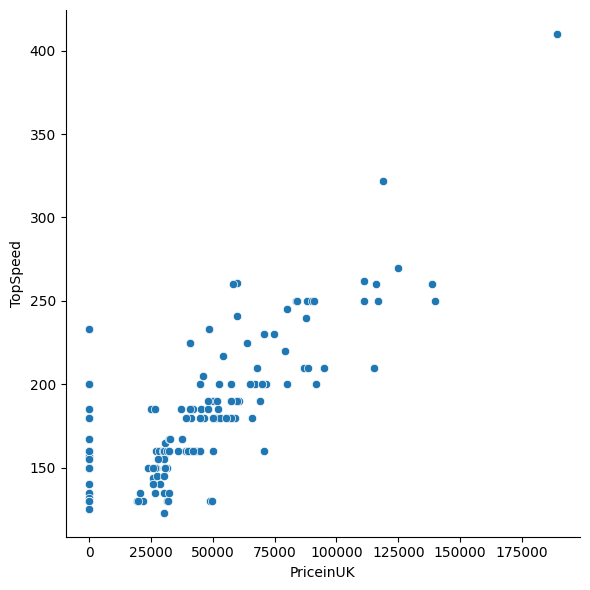

In [34]:
#relation between price and features

sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df1)

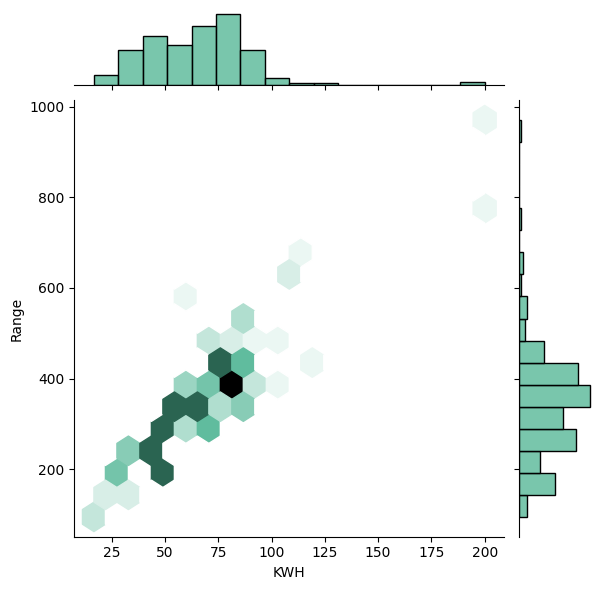

In [35]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")

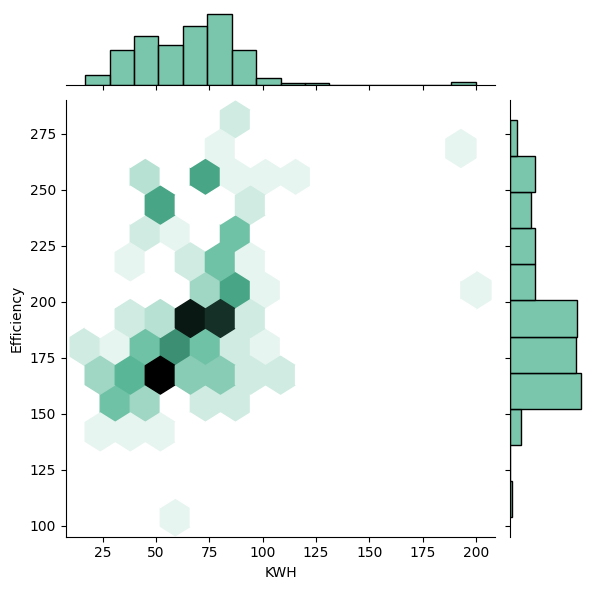

In [36]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")

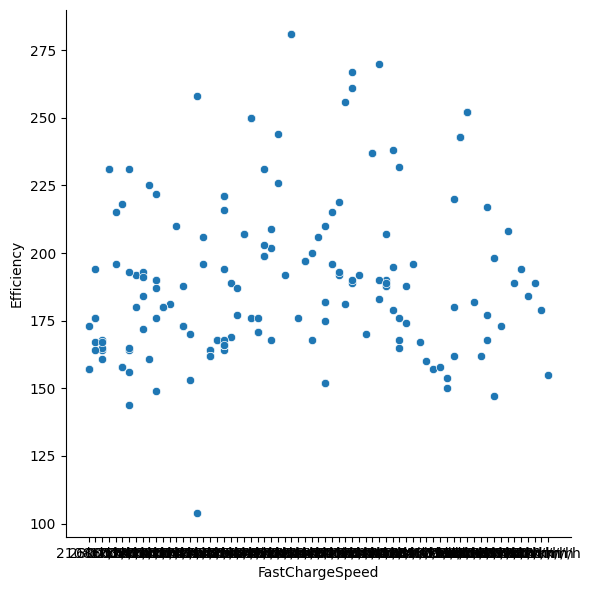

In [59]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)

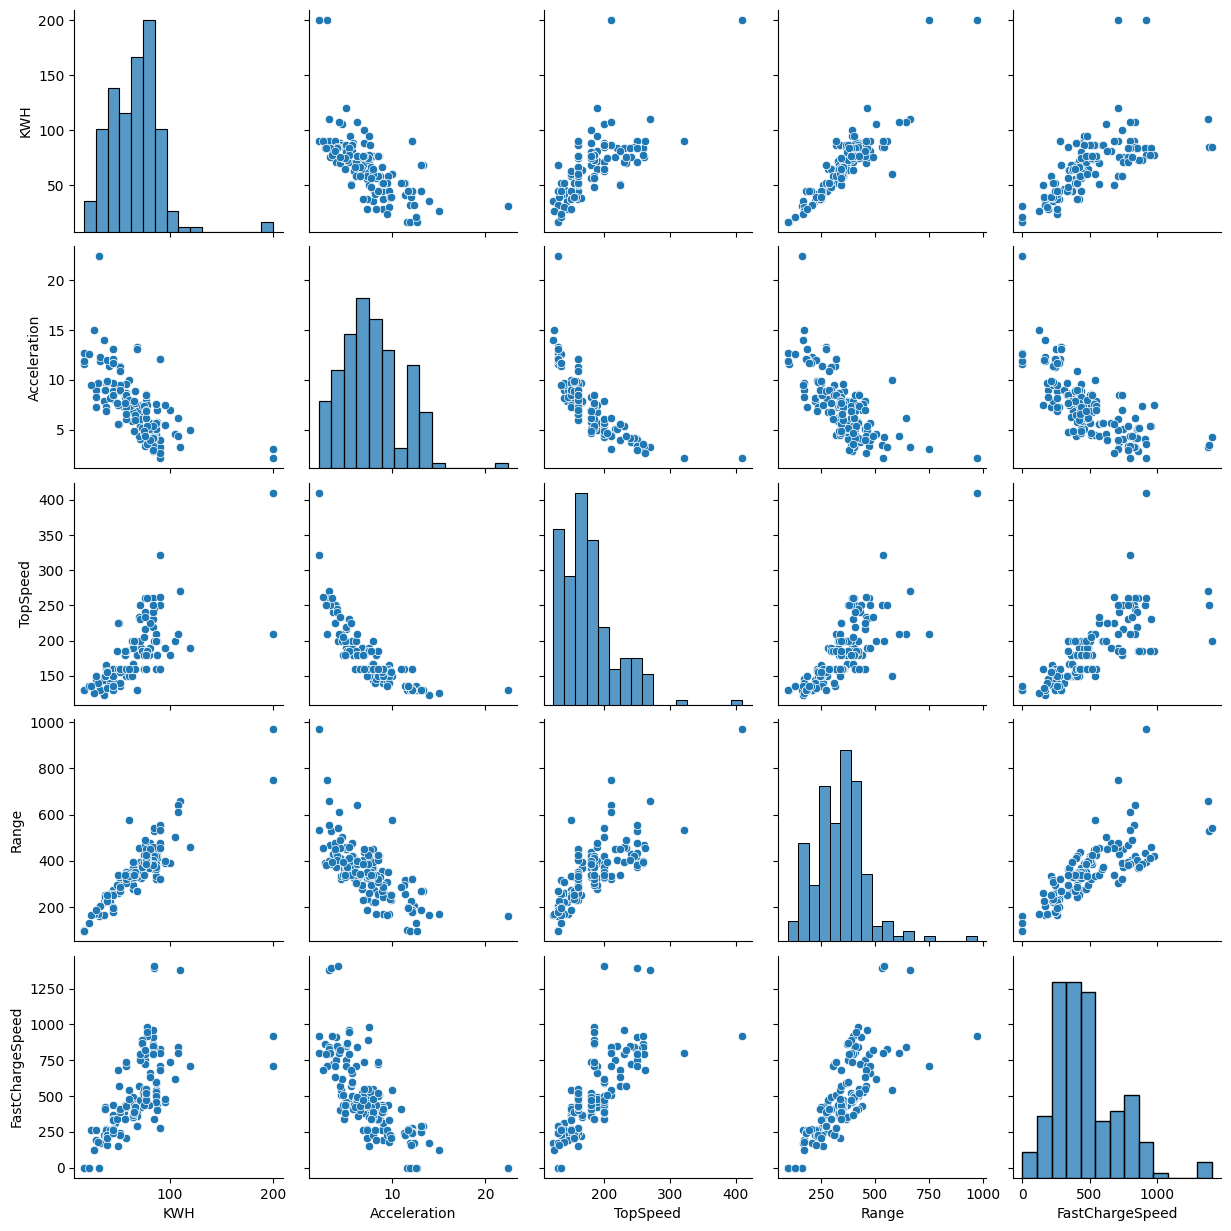

In [37]:
sns.pairplot(df1[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

In [38]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


### Machine Learning Model
We will predict the price of the vehicle based on all the parameters and data, one thing to be pointed is that many data points are missing. Let us take only the prices in UK Pound.

Considering 1 Euro = 0.85 Pound

In [39]:
c=0
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)      

Empty Values: 44


In [80]:
 pd.options.mode.chained_assignment = None

In [40]:
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val
        

C:\Users\2021\.conda\envs\electricvehiclepriceprediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [66]:
pip install category_encoders

     -------------------------------------- 82.0/82.0 kB 920.0 kB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 912.9 kB/s eta 0:00:00
     ------------------------------------ 232.9/232.9 kB 749.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
import category_encoders as ce

train_df=df1

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])


#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data
df_train.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,1,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,1,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,1,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,3,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,3,4,186336,138830,Porsche


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 16.3+ KB


In [44]:
X= df_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values

In [45]:
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [46]:
y=df_train['PriceinUK'].values

In [47]:
X.shape

(180, 8)

In [48]:
y.shape

(180,)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [50]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [51]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [52]:
y_pred= regressor.predict(X_test)

In [53]:
y_test

array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580], dtype=int64)

In [54]:
y_pred

array([ 54441.6325    ,  31066.27555556,  41380.        ,  45479.69333333,
       114520.10011111,  35399.57666667,  40735.42897222,  32830.70111111,
        54001.08666667,  54295.79666667,  31681.26083333,  49643.10804365,
        40735.42897222,  35409.45458333,  64010.02277778,  49643.10804365,
        46875.94537302,  44265.14      ,  47877.97145238,  26695.64938889,
        53521.39666667,  71343.52896032,  74522.66555556,  86362.50333333,
        31944.27194444,  49637.88687698,  33099.70666667,  50518.21761905,
        36664.97611111,  84756.28011111,  26485.26066667,  55484.98333333,
        33099.70666667,  81142.91716667,  23535.63061111,  36504.92666667,
        49637.88687698,  41719.56333333,  31008.96444444,  71014.14102381,
        33094.92033333,  53272.6       ,  54491.59777778,  64035.14169048,
        49643.10804365,  58952.72694444,  23120.55166667,  37367.93833333,
        48409.47016667,  70814.42507143, 127800.99333333,  53660.58111111,
        32744.97711111,  

In [55]:
#Mean Absolute Error(MAE)

from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7155.050407804233


In [56]:
#Mean Squared Error(MSE)

from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  107902152.72013463


In [57]:
#Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10387.596099200942


In [58]:
#R Squared (R2)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.815987092758551


In [59]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [60]:
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(normalize=False)

In [61]:
predictions = lasso_model.predict(X_test)
print(predictions)

[ 64060.35920317  26636.46992917  50622.68543003  49228.76808368
  71428.33099538  44135.90070556  38759.12882194  40647.94941233
  54918.1169327   55201.66758773  28528.92049078  43842.27479079
  38759.12882194  37159.55379761  70466.82579811  43842.27479079
  43280.2675024   47345.31197707  53448.1996281   16866.73302997
  57855.38748655  82355.59241274  84193.96472968  87020.01649342
  25324.65712277  43566.33211648  37474.6086577   58967.3716236
  40036.25782367  88081.64517432  18658.14655295  53841.20880253
  37474.6086577   68910.79532844  -1784.84284892  43564.52915179
  43566.33211648  50988.66505024  26912.41260349  73422.67796835
  39958.89100426  75678.74928928  64046.04009451  71523.85206571
  43842.27479079  68588.68536083  15418.97111357  37193.07273867
  52371.22528925  87270.56765023 116947.20423769  59816.04464196
  22958.09054717  21007.25634978  36338.02233858  51270.23196852
  38759.12882194  62503.72215603  43556.63442406  85195.0388804 ]


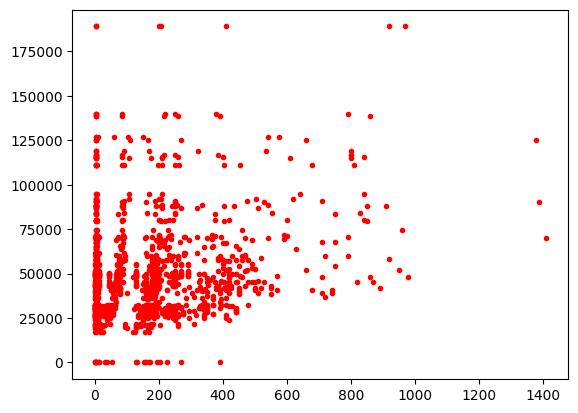

r2_score 0.815987092758551
mean_squared_error 107902152.72013463
mean_absolute_error 7155.050407804233


In [62]:
plt.plot(X, y, "r.")
plt.show()
print("r2_score", r2_score(y_test, regressor.predict(X_test)))
print("mean_squared_error", mean_squared_error(y_test, regressor.predict(X_test)))
print("mean_absolute_error", mean_absolute_error(y_test, regressor.predict(X_test)))

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_test, y_test)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.2


In [64]:
dt_clf = DecisionTreeClassifier(max_depth=20)
dt_clf.fit(X_test, y_test)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.8666666666666667


In [65]:
dt_clf = DecisionTreeClassifier(max_depth=22)
dt_clf.fit(X_test, y_test)

print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.9


In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 543 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=9425fdfd1c6ff787b228cf253c31a49163613e4a97c3b936b2f163a1fa2f312e
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


In [66]:
df1.Name[2:]

2                             Nissan Leaf 
3         Audi e-tron Sportback 55 quattro
4                   Porsche Taycan Turbo S
5                   Nissan e-NV200 Evalia 
6         Volkswagen ID.3 Pure Performance
                      ...                 
175                           MG Marvel R 
176    Tesla Model 3 Long Range Dual Motor
177                   MG MG5 EV Long Range
178              Audi Q4 e-tron 45 quattro
179            Audi Q4 Sportback e-tron 40
Name: Name, Length: 178, dtype: object

In [67]:
df1.Range[2:]

2      220
3      375
4      390
5      165
6      275
      ... 
175    340
176    490
177    340
178    385
179    425
Name: Range, Length: 178, dtype: int64

In [70]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [72]:
from sklearn import tree

In [76]:
clf = tree.DecisionTreeClassifier(random_state=0)

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree



In [77]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2500x2000 with 0 Axes>

### GRIDSEARCH

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 5, 10]}
clf = GridSearchCV(svm.SVC(), parameters, cv=3)
clf.fit(X_test, y_test)

print(sorted(clf.cv_results_.keys()))

print('Best parameters: {}'.format(clf.best_params_))


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
Best parameters: {'C': 1, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


In [ ]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

### PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array(X_test)
pca = PCA(n_components=2)
comps = pca.fit_transform(X)


In [ ]:
pca.__dict__

{'_fit_svd_solver': 'full',
 'components_': array([[ 0.05769603, -0.01223038,  0.16000968,  0.35572863, -0.03377784,
          0.91827155,  0.00321398, -0.00131255],
        [-0.12329936,  0.01137492, -0.14092179, -0.88978336,  0.16220929,
          0.38311881, -0.00094325,  0.00131471]]),
 'copy': True,
 'explained_variance_': array([47852.28288865,  3024.70491806]),
 'explained_variance_ratio_': array([0.91187038, 0.0576386 ]),
 'iterated_power': 'auto',
 'mean_': array([ 65.105     ,   8.01      , 175.15      , 333.83333333,
        197.65      , 452.66666667,   1.95      ,   5.38333333]),
 'n_components': 2,
 'n_components_': 2,
 'n_features_': 8,
 'n_features_in_': 8,
 'n_samples_': 60,
 'noise_variance_': 266.67983588676947,
 'random_state': None,
 'singular_values_': array([1680.26328009,  422.44241047]),
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
pca.components_

array([[ 0.05769603, -0.01223038,  0.16000968,  0.35572863, -0.03377784,
         0.91827155,  0.00321398, -0.00131255],
       [-0.12329936,  0.01137492, -0.14092179, -0.88978336,  0.16220929,
         0.38311881, -0.00094325,  0.00131471]])

In [ ]:
comps

array([[  25.83053794,  -11.12826199],
       [-147.0598128 ,   30.76368625],
       [ 129.87758327,  -69.73953454],
       [ 227.49684001,  122.46850155],
       [ 267.24496408,  -36.02863305],
       [ -54.31657153,  -90.59509938],
       [-249.01874939,   71.03130045],
       [  -7.66428421,  -21.34305137],
       [ 389.01063551,  121.26325229],
       [ 400.03954982,  120.321105  ],
       [ -35.01786266,   46.66121142],
       [-181.04262249,    9.3621154 ],
       [-249.01874939,   71.03130045],
       [ -84.08903078,   36.50071395],
       [  29.25680091,  -44.35521865],
       [-181.04262249,    9.3621154 ],
       [-260.2165529 ,   72.78449422],
       [ -26.32351541,  -26.18300464],
       [ -61.7761575 ,  -38.93491677],
       [-239.13294303,  -12.43907662],
       [  48.43602398,  -46.55522233],
       [  85.42978964,   34.61975852],
       [ 521.16277049,   69.51550058],
       [ 373.83307592,  -11.1994031 ],
       [-163.39255526,   15.53399238],
       [-181.04017641,   

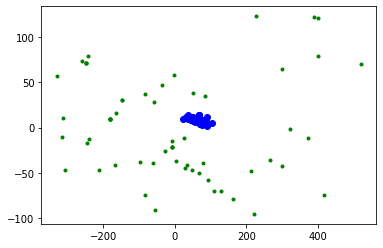

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:,1], 'bo')
plt.plot(comps[:, 0], comps[:, 1], 'g.')


In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.91187038 0.0576386 ]
[1680.26328009  422.44241047]


In [ ]:
len(pca.explained_variance_ratio_)
print(X_train.shape)

(120, 8)


In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

2
0.9816045834472688
